In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Json
import re
import json

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import train & test data 
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv') # example of what a submission should look like

In [3]:
# View the training data
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
len(train)

3000

In [5]:
# View the test data (same columns as the training data)
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [6]:
len(test)

4398

In [7]:
# View the example submisison dataframe
sample_submission.head()

,id,revenue
0,3001,1000000
1,3002,1000000
2,3003,1000000
3,3004,1000000
4,3005,1000000


In [8]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


# Getting missing values

In [9]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


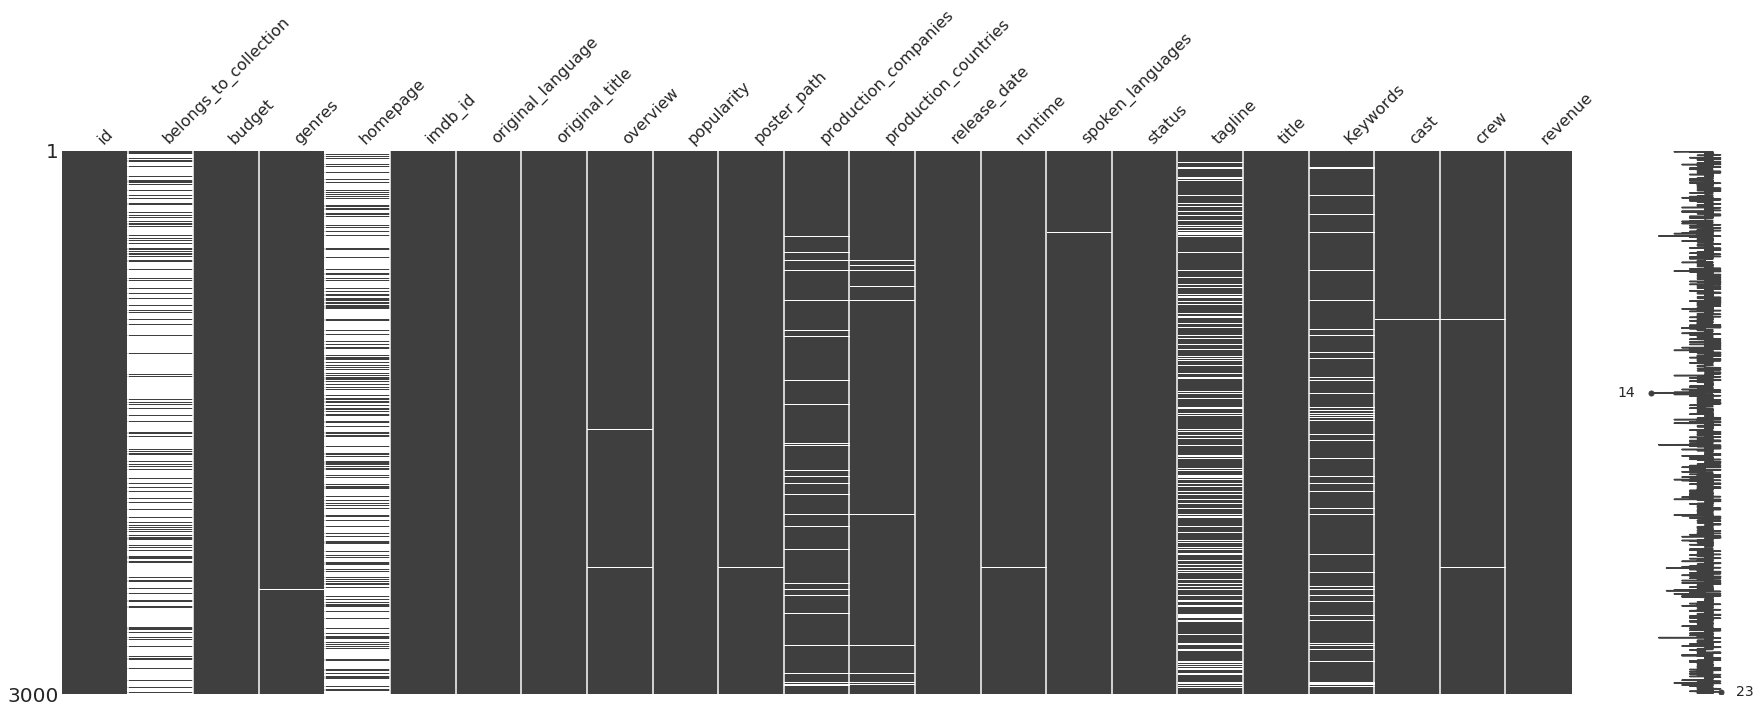

In [10]:
missingno.matrix(train, figsize=(30, 10))

## Get missing values

In [11]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [12]:
def find_missing_values(df, columns):
    missing_values = {}
    df_length = len(df)
    
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_values[column] = df_length - total_column_values
    return missing_values 

In [13]:
missing_values = find_missing_values(train, train.columns)

In [14]:
missing_values

{'id': 0,
 'belongs_to_collection': 2396,
 'budget': 0,
 'genres': 7,
 'homepage': 2054,
 'imdb_id': 0,
 'original_language': 0,
 'original_title': 0,
 'overview': 8,
 'popularity': 0,
 'poster_path': 1,
 'production_companies': 156,
 'production_countries': 55,
 'release_date': 0,
 'runtime': 2,
 'spoken_languages': 20,
 'status': 0,
 'tagline': 597,
 'title': 0,
 'Keywords': 276,
 'cast': 13,
 'crew': 16,
 'revenue': 0}

## Cleaning data

In [15]:
len(train)

3000

In [16]:
train = train.dropna(subset=['poster_path'])
train = train.dropna(subset=['cast'])
train = train.dropna(subset=['spoken_languages'])
train = train.dropna(subset=['crew'])
train = train.dropna(subset=['genres'])
len(train)

2961

In [17]:
missing_values = find_missing_values(train, train.columns)
missing_values

{'id': 0,
 'belongs_to_collection': 2363,
 'budget': 0,
 'genres': 0,
 'homepage': 2025,
 'imdb_id': 0,
 'original_language': 0,
 'original_title': 0,
 'overview': 6,
 'popularity': 0,
 'poster_path': 0,
 'production_companies': 140,
 'production_countries': 44,
 'release_date': 0,
 'runtime': 0,
 'spoken_languages': 0,
 'status': 0,
 'tagline': 580,
 'title': 0,
 'Keywords': 261,
 'cast': 0,
 'crew': 0,
 'revenue': 0}

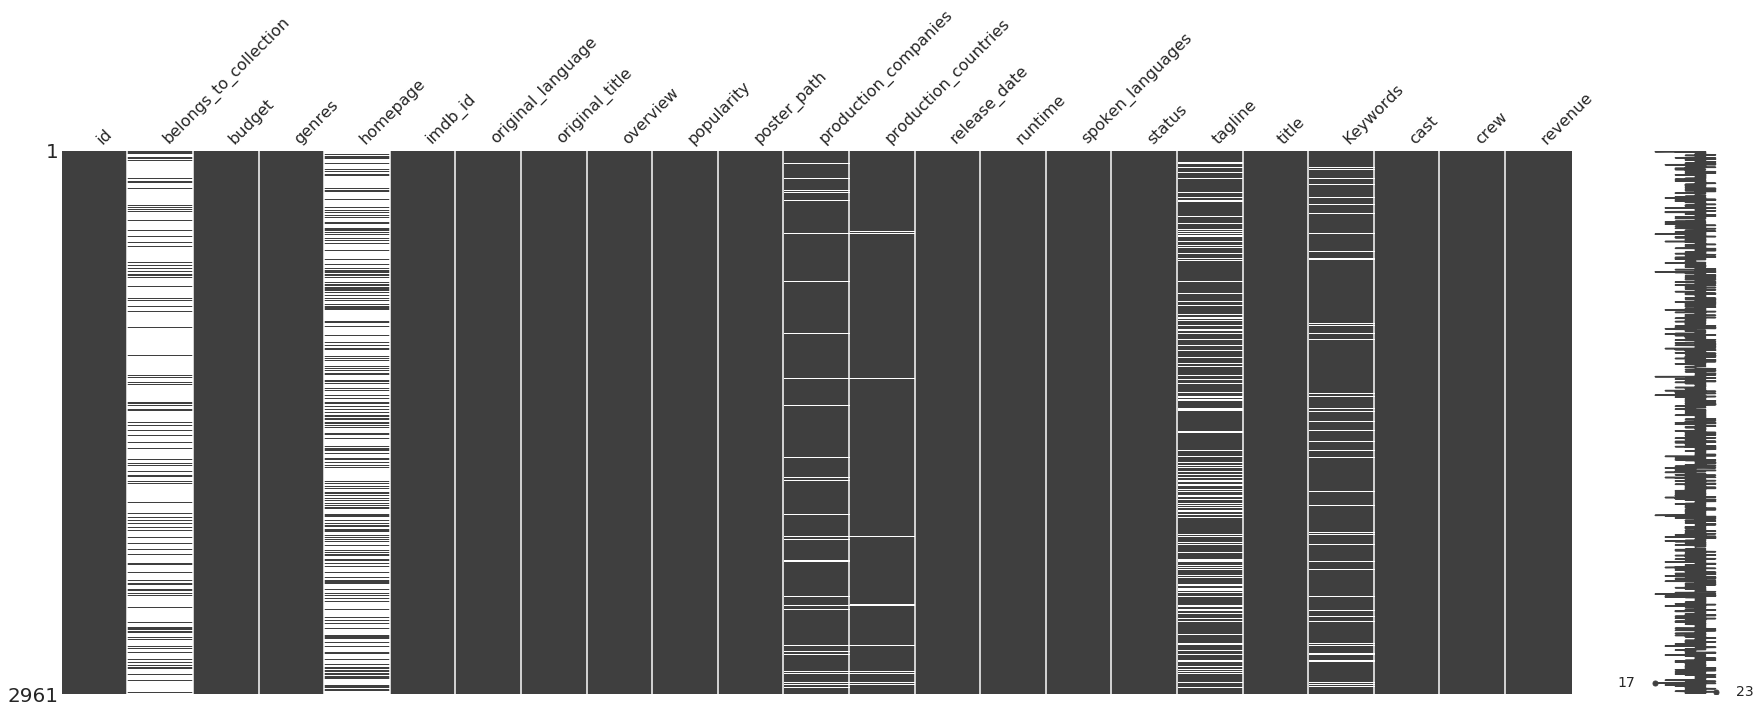

In [18]:
missingno.matrix(train, figsize=(30, 10))

## Analyze the data

In [19]:
df_con = pd.DataFrame() # for continuous variables

In [20]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [21]:
df_con["id"] = train["id"]

In [22]:
df_con.head()

,id
0,1
1,2
2,3
3,4
4,5


## Feature: revenue

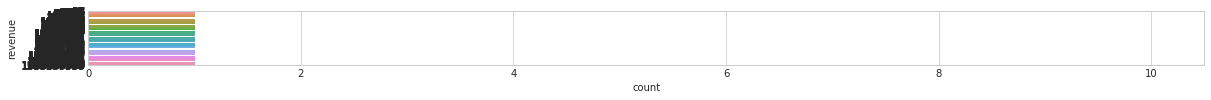

In [23]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y="revenue", data=train)

In [24]:
# df_bin['Survived'] = train["Survived"]
df_con['revenue'] = train["revenue"]

In [25]:
df_con.head()

,id,revenue
0,1,12314651
1,2,95149435
2,3,13092000
3,4,16000000
4,5,3923970


## Feature: budget

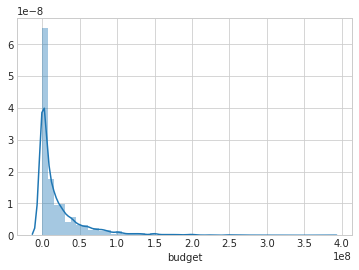

In [26]:
sns.distplot(train["budget"])

In [27]:
missing_values["budget"]

0

In [28]:
df_con["budget"] = train["budget"]

In [29]:
df_con.head()

,id,revenue,budget
0,1,12314651,14000000
1,2,95149435,40000000
2,3,13092000,3300000
3,4,16000000,1200000
4,5,3923970,0


## Feature : popularity

In [30]:
train.popularity.value_counts().sum()

2961

In [31]:
column = "popularity"
missing_values[column]

0

In [32]:
df_con[column] = train[column]

In [33]:
df_con.head()

,id,revenue,budget,popularity
0,1,12314651,14000000,6.575393
1,2,95149435,40000000,8.248895
2,3,13092000,3300000,64.299990
3,4,16000000,1200000,3.174936
4,5,3923970,0,1.148070


## Feature: genres

In [34]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [35]:
column = 'genres'

In [36]:
train[column].head()

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

In [37]:
missing_values[column]

0

In [38]:
df_con[column] = train[column]
df_con.head()

,id,revenue,budget,popularity,genres
0,1,12314651,14000000,6.575393,"[{'id': 35, 'name': 'Comedy'}]"
1,2,95149435,40000000,8.248895,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2,3,13092000,3300000,64.299990,"[{'id': 18, 'name': 'Drama'}]"
3,4,16000000,1200000,3.174936,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
4,5,3923970,0,1.148070,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."


In [39]:
def get_id(s):
    return re.findall(r'-?\d*\.?\d+', s)

In [40]:
get_id("[{'id': 35, 'name': 'Comedy'}]")

['35']

In [41]:
df_con[column] = df_con[column].apply(get_id)

In [42]:
df_con.head()

,id,revenue,budget,popularity,genres
0,1,12314651,14000000,6.575393,[35]
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]"
2,3,13092000,3300000,64.299990,[18]
3,4,16000000,1200000,3.174936,"[53, 18]"
4,5,3923970,0,1.148070,"[28, 53]"


# Feature: original_language

In [43]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [44]:
column = "original_language"

In [45]:
train[column].head()

0    en
1    en
2    en
3    hi
4    ko
Name: original_language, dtype: object

In [46]:
df_con[column] = train[column]

In [47]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language
0,1,12314651,14000000,6.575393,[35],en
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en
2,3,13092000,3300000,64.299990,[18],en
3,4,16000000,1200000,3.174936,"[53, 18]",hi
4,5,3923970,0,1.148070,"[28, 53]",ko


In [48]:
df_con[column].value_counts()

en    2542
fr      77
ru      44
es      43
hi      42
ja      37
it      23
cn      20
ko      20
zh      19
de      17
ta      16
sv       8
pt       6
nl       6
da       5
fa       5
ro       4
hu       3
tr       3
fi       2
no       2
pl       2
ml       2
te       2
bn       1
he       1
ar       1
nb       1
el       1
mr       1
ur       1
sr       1
id       1
vi       1
cs       1
Name: original_language, dtype: int64

## Featur: original_title

In [49]:
column = "original_title"

In [50]:
train[column].head()

0                      Hot Tub Time Machine 2
1    The Princess Diaries 2: Royal Engagement
2                                    Whiplash
3                                     Kahaani
4                                        마린보이
Name: original_title, dtype: object

In [51]:
df_con[column] = train[column].str.len()

In [52]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title
0,1,12314651,14000000,6.575393,[35],en,22
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40
2,3,13092000,3300000,64.299990,[18],en,8
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7
4,5,3923970,0,1.148070,"[28, 53]",ko,4


## Feature: overview

In [53]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [54]:
column = "overview"

In [55]:
train[column].head()

0    When Lou, who has become the "father of the In...
1    Mia Thermopolis is now a college graduate and ...
2    Under the direction of a ruthless instructor, ...
3    Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4    Marine Boy is the story of a former national s...
Name: overview, dtype: object

In [56]:
df_con[column] = train[column].astype(str)
df_con[column] = df_con[column].str.len()

In [57]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview
0,1,12314651,14000000,6.575393,[35],en,22,155
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393
2,3,13092000,3300000,64.299990,[18],en,8,130
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168


## Feature: production_companies

In [58]:
column = "production_companies"

In [59]:
missing_values[column]

140

In [60]:
train[column].head()

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                  NaN
4                                                  NaN
Name: production_companies, dtype: object

In [61]:
df_con[column] = train[column]
df_con[column] = df_con[column].fillna("")

In [62]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies
0,1,12314651,14000000,6.575393,[35],en,22,155,"[{'name': 'Paramount Pictures', 'id': 4}, {'na..."
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,"[{'name': 'Walt Disney Pictures', 'id': 2}]"
2,3,13092000,3300000,64.299990,[18],en,8,130,"[{'name': 'Bold Films', 'id': 2266}, {'name': ..."
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,


In [63]:
df_con[column] = df_con[column].apply(get_id)
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]"
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2]
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]"
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[]
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[]


## Feature : production_countries

In [64]:
column = "production_countries"

In [65]:
train[column].head()

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3              [{'iso_3166_1': 'IN', 'name': 'India'}]
4        [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
Name: production_countries, dtype: object

In [66]:
missing_values[column]

44

In [67]:
def get_column_values(s, col):
    s = s.replace("[", "").replace("]", "").replace("{", "").replace("}", "")
    arr = s.split(",")
    c = list(filter(lambda x: x.strip().startswith(f"'{col}'"), arr))
    return [ i.split(":")[1].strip() for i in c]

In [68]:
df_con[column] = train[column]
df_con[column] = df_con[column].fillna("")
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]","[{'iso_3166_1': 'US', 'name': 'United States o..."
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],"[{'iso_3166_1': 'US', 'name': 'United States o..."
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]","[{'iso_3166_1': 'US', 'name': 'United States o..."
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]"
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]"


In [69]:
df_con[column] = df_con[column].apply(lambda x: get_column_values(x, 'iso_3166_1'))

In [70]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US']
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US']
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US']
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN']
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR']


## Feature: release_date

In [71]:
column = "release_date"

In [72]:
train[column].head()

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

In [73]:
missing_values[column]

0

In [74]:
df_con[column] = train[column]

In [75]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries,release_date
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US'],2/20/15
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US'],8/6/04
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US'],10/10/14
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN'],3/9/12
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR'],2/5/09


In [76]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

## feature : runtime

In [77]:
column = "runtime"

In [78]:
train[column].head()

0     93.0
1    113.0
2    105.0
3    122.0
4    118.0
Name: runtime, dtype: float64

In [79]:
missing_values[column]

0

In [80]:
df_con[column] = train[column].astype(int)

In [81]:
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries,release_date,runtime
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US'],2/20/15,93
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US'],8/6/04,113
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US'],10/10/14,105
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN'],3/9/12,122
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR'],2/5/09,118


## feature: spoken_languages

In [82]:
column = "spoken_languages"

In [83]:
train[column].head()

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
Name: spoken_languages, dtype: object

In [84]:
missing_values[column]

0

In [85]:
df_con[column] = train[column]
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries,release_date,runtime,spoken_languages
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US'],2/20/15,93,"[{'iso_639_1': 'en', 'name': 'English'}]"
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US'],8/6/04,113,"[{'iso_639_1': 'en', 'name': 'English'}]"
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US'],10/10/14,105,"[{'iso_639_1': 'en', 'name': 'English'}]"
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN'],3/9/12,122,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR'],2/5/09,118,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]"


In [86]:
df_con[column] = df_con[column].apply(lambda x: get_column_values(x, 'iso_639_1'))
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries,release_date,runtime,spoken_languages
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US'],2/20/15,93,['en']
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US'],8/6/04,113,['en']
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US'],10/10/14,105,['en']
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN'],3/9/12,122,"['en', 'hi']"
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR'],2/5/09,118,['ko']


## Feature: status

In [87]:
column = "status"

In [88]:
train[column].head()

0    Released
1    Released
2    Released
3    Released
4    Released
Name: status, dtype: object

In [89]:
missing_values[column]

0

In [90]:
train[column].value_counts()

Released    2957
Rumored        4
Name: status, dtype: int64

In [91]:
df_con[column] = train[column]
df_con[column] = np.where(df_con[column] == "Released", 0, 1)
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US'],2/20/15,93,['en'],0
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US'],8/6/04,113,['en'],0
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US'],10/10/14,105,['en'],0
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN'],3/9/12,122,"['en', 'hi']",0
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR'],2/5/09,118,['ko'],0


## Feature : tagline

In [92]:
column = "tagline"

In [93]:
train[column].head()

0    The Laws of Space and Time are About to be Vio...
1    It can take a lifetime to find true love; she'...
2      The road to greatness can take you to the edge.
3                                                  NaN
4                                                  NaN
Name: tagline, dtype: object

In [94]:
missing_values[column]

580

In [95]:
df_con[column] = train[column]
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US'],2/20/15,93,['en'],0,The Laws of Space and Time are About to be Vio...
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US'],8/6/04,113,['en'],0,It can take a lifetime to find true love; she'...
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US'],10/10/14,105,['en'],0,The road to greatness can take you to the edge.
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN'],3/9/12,122,"['en', 'hi']",0,NaN
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR'],2/5/09,118,['ko'],0,NaN


In [96]:
df_con[column] = df_con[column].fillna("")
df_con[column] = df_con[column].str.len()
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US'],2/20/15,93,['en'],0,52
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US'],8/6/04,113,['en'],0,60
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US'],10/10/14,105,['en'],0,47
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN'],3/9/12,122,"['en', 'hi']",0,0
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR'],2/5/09,118,['ko'],0,0


## Feature: title

In [97]:
column = "title"

In [98]:
train[column].head()

0                      Hot Tub Time Machine 2
1    The Princess Diaries 2: Royal Engagement
2                                    Whiplash
3                                     Kahaani
4                                  Marine Boy
Name: title, dtype: object

In [99]:
missing_values[column]

0

In [100]:
df_con[column] = train[column]
df_con[column] = df_con[column].str.len()
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US'],2/20/15,93,['en'],0,52,22
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US'],8/6/04,113,['en'],0,60,40
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US'],10/10/14,105,['en'],0,47,8
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN'],3/9/12,122,"['en', 'hi']",0,0,7
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR'],2/5/09,118,['ko'],0,0,10


In [101]:
df_con["title_discrepancy"] = df_con["original_title"] - df_con["title"]
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,title_discrepancy
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US'],2/20/15,93,['en'],0,52,22,0
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US'],8/6/04,113,['en'],0,60,40,0
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US'],10/10/14,105,['en'],0,47,8,0
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN'],3/9/12,122,"['en', 'hi']",0,0,7,0
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR'],2/5/09,118,['ko'],0,0,10,-6


In [102]:
df_con["title_discrepancy"].value_counts().head()

 0    2642
-2      41
-1      28
 1      26
 2      21
Name: title_discrepancy, dtype: int64

## Feature: Keywords

In [103]:
column = "Keywords"

In [104]:
train[column].head()

0    [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1    [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2    [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3    [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                  NaN
Name: Keywords, dtype: object

In [105]:
missing_values[column]

261

In [106]:
df_con[column] = train[column]
df_con[column] = df_con[column].fillna("")
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,title_discrepancy,Keywords
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US'],2/20/15,93,['en'],0,52,22,0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9..."
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US'],8/6/04,113,['en'],0,60,40,0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42..."
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US'],10/10/14,105,['en'],0,47,8,0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n..."
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN'],3/9/12,122,"['en', 'hi']",0,0,7,0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054..."
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR'],2/5/09,118,['ko'],0,0,10,-6,


In [107]:
df_con[column] = df_con[column].apply(get_id)
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,title_discrepancy,Keywords
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US'],2/20/15,93,['en'],0,52,22,0,"[4379, 9663, 11830, 179431]"
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US'],8/6/04,113,['en'],0,60,40,0,"[2505, 4263, 6038, 13072]"
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US'],10/10/14,105,['en'],0,47,8,0,"[1416, 1523, 1640, 2176, 14512, 14819, 33896, ..."
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN'],3/9/12,122,"['en', 'hi']",0,0,7,0,"[10092, 10540, 11734, 14536, 14636, 208364, 22..."
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR'],2/5/09,118,['ko'],0,0,10,-6,[]


## Feature: cast

In [108]:
column = "cast"

In [109]:
train[column].head()

0    [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1    [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2    [{'cast_id': 5, 'character': 'Andrew Neimann',...
3    [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4    [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
Name: cast, dtype: object

In [110]:
missing_values[column]

0

In [111]:
df_con[column] = train[column]
df_con[column] = df_con[column].apply(lambda x: get_column_values(x, 'id'))
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,title_discrepancy,Keywords,cast
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US'],2/20/15,93,['en'],0,52,22,0,"[4379, 9663, 11830, 179431]","[52997, 64342, 54729, 36801, 54812, 94098, 115..."
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US'],8/6/04,113,['en'],0,60,40,0,"[2505, 4263, 6038, 13072]","[1813, 5823, 1210, 655, 33656, 62064, 68287, 1..."
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US'],10/10/14,105,['en'],0,47,8,0,"[1416, 1523, 1640, 2176, 14512, 14819, 33896, ...","[996701, 18999, 129104, 970216, 223012, 159366..."
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN'],3/9/12,122,"['en', 'hi']",0,0,7,0,"[10092, 10540, 11734, 14536, 14636, 208364, 22...","[35068, 85047, 1021524, 1093644, 86033, 92686,..."
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR'],2/5/09,118,['ko'],0,0,10,-6,[],"[84751, 64453, 84752, 1130534]"


In [112]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

# Feature: crew

In [113]:
column = "crew"

In [114]:
train[column].head()

0    [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1    [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2    [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
3    [{'credit_id': '52fe48779251416c9108d6eb', 'de...
4    [{'credit_id': '52fe464b9251416c75073b43', 'de...
Name: crew, dtype: object

In [115]:
missing_values[column]

0

In [116]:
df_con[column] = train[column]
df_con[column] = df_con[column].apply(lambda x: get_column_values(x, 'id'))
df_con.head()

,id,revenue,budget,popularity,genres,original_language,original_title,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,title_discrepancy,Keywords,cast,crew
0,1,12314651,14000000,6.575393,[35],en,22,155,"[4, 60, 8411]",['US'],2/20/15,93,['en'],0,52,22,0,"[4379, 9663, 11830, 179431]","[52997, 64342, 54729, 36801, 54812, 94098, 115...","[1449071, 3227, 347335, 347335, 57822, 1451395..."
1,2,95149435,40000000,8.248895,"[35, 18, 10751, 10749]",en,40,393,[2],['US'],8/6/04,113,['en'],0,60,40,0,"[2505, 4263, 6038, 13072]","[1813, 5823, 1210, 655, 33656, 62064, 68287, 1...","[1201, 1214, 4500, 8851, 12970, 38415, 38416, ..."
2,3,13092000,3300000,64.299990,[18],en,8,130,"[2266, 3172, 32157]",['US'],10/10/14,105,['en'],0,47,8,0,"[1416, 1523, 1640, 2176, 14512, 14819, 33896, ...","[996701, 18999, 129104, 970216, 223012, 159366...","[494, 6745, 9250, 23783, 23786, 53181, 52443, ..."
3,4,16000000,1200000,3.174936,"[53, 18]",hi,7,581,[],['IN'],3/9/12,122,"['en', 'hi']",0,0,7,0,"[10092, 10540, 11734, 14536, 14636, 208364, 22...","[35068, 85047, 1021524, 1093644, 86033, 92686,...","[95510, 95510, 95510]"
4,5,3923970,0,1.148070,"[28, 53]",ko,4,168,[],['KR'],2/5/09,118,['ko'],0,0,10,-6,[],"[84751, 64453, 84752, 1130534]","[84749, 84749]"


## Feature engineering

In [148]:
# df_con = df_con.drop('genres', 1)
# df_con = df_con.drop('production_companies', 1)
# df_con = df_con.drop('production_countries', 1)
# df_con = df_con.drop('spoken_languages', 1)
# df_con = df_con.drop('Keywords', 1)
# df_con = df_con.drop('cast', 1)
# df_con = df_con.drop('crew', 1)
df_con = df_con.drop('release_date', 1)
df_con = df_con.drop('popularity', 1)
df_con = df_con.drop('id', 1)
df_con = df_con.drop('status', 1)

df_con_enc = df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head()

,revenue,budget,original_language,original_title,overview,runtime,tagline,title,title_discrepancy
0,1225,255,7,21,103,33,48,21,30
1,2244,307,7,39,341,53,56,39,30
2,1245,154,7,7,78,45,43,7,30
3,1332,103,13,6,508,62,0,6,30
4,831,0,18,3,116,58,0,9,24


# Machine Learning Models

In [172]:
selected_df = df_con_enc
X_train = selected_df.drop("revenue", axis=1)
Y_train = selected_df["revenue"]

# Define a function to fit machine learning algorithms

In [127]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    start_time = time.time()
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    log_time = (time.time() - start_time)
    exec_time = datetime.timedelta(seconds=log_time)
    
    return train_pred, acc, acc_cv, exec_time

## Logistic Regression

In [ ]:
# Logistic Regression
train_pred_log, acc_log, acc_cv_log, exec_time = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % exec_time)

## K-Nearest Neighbours

In [129]:
# k-Nearest Neighbours
train_pred_knn, acc_knn, acc_cv_knn, exec_time = fit_ml_algo(KNeighborsClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % exec_time)

Accuracy: 19.93
Accuracy CV 10-Fold: 0.03
Running Time: 0:00:01.342149


## Stochastic Gradient Descent

In [131]:
train_pred_sgd, acc_sgd, acc_cv_sgd, exec_time = fit_ml_algo(SGDClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % exec_time)

Accuracy: 0.1
Accuracy CV 10-Fold: 0.07
Running Time: 0:00:28.192393


## CatBoost Algorithm

In [150]:
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([0, 1, 2, 3, 4, 5, 6, 7])

In [151]:
train_pool = Pool(X_train, Y_train, cat_features)

In [152]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, Y_train) * 100, 2)


Learning rate set to 0.022779


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6183038	total: 32.4ms	remaining: 32.3s
1:	learn: 0.5510061	total: 54.7ms	remaining: 27.3s
2:	learn: 0.4922038	total: 81.8ms	remaining: 27.2s
3:	learn: 0.4382149	total: 96ms	remaining: 23.9s
4:	learn: 0.3901430	total: 110ms	remaining: 21.9s
5:	learn: 0.3477843	total: 126ms	remaining: 20.8s
6:	learn: 0.3098899	total: 139ms	remaining: 19.8s
7:	learn: 0.2763458	total: 153ms	remaining: 19s
8:	learn: 0.2466861	total: 167ms	remaining: 18.4s
9:	learn: 0.2204807	total: 181ms	remaining: 17.9s
10:	learn: 0.1973372	total: 197ms	remaining: 17.7s
11:	learn: 0.1770532	total: 213ms	remaining: 17.5s
12:	learn: 0.1592941	total: 231ms	remaining: 17.5s
13:	learn: 0.1436465	total: 249ms	remaining: 17.5s
14:	learn: 0.1298309	total: 267ms	remaining: 17.5s
15:	learn: 0.1172417	total: 281ms	remaining: 17.3s
16:	learn: 0.1060943	total: 295ms	remaining: 17s
17:	learn: 0.0962135	total: 308ms	remaining: 16.8s
18:	learn: 0.0880471	total: 340ms	remaining: 17.5s
19:	learn: 0.0801909	total: 354ms	remaining

166:	learn: 0.0072233	total: 3.23s	remaining: 16.1s
167:	learn: 0.0072203	total: 3.25s	remaining: 16.1s
168:	learn: 0.0072200	total: 3.26s	remaining: 16s
169:	learn: 0.0072093	total: 3.29s	remaining: 16.1s
170:	learn: 0.0072021	total: 3.31s	remaining: 16s
171:	learn: 0.0071972	total: 3.32s	remaining: 16s
172:	learn: 0.0071534	total: 3.37s	remaining: 16.1s
173:	learn: 0.0071124	total: 3.42s	remaining: 16.2s
174:	learn: 0.0071122	total: 3.44s	remaining: 16.2s
175:	learn: 0.0071039	total: 3.46s	remaining: 16.2s
176:	learn: 0.0070657	total: 3.51s	remaining: 16.3s
177:	learn: 0.0070655	total: 3.52s	remaining: 16.3s
178:	learn: 0.0070605	total: 3.55s	remaining: 16.3s
179:	learn: 0.0070385	total: 3.58s	remaining: 16.3s
180:	learn: 0.0070200	total: 3.59s	remaining: 16.3s
181:	learn: 0.0069970	total: 3.63s	remaining: 16.3s
182:	learn: 0.0069936	total: 3.67s	remaining: 16.4s
183:	learn: 0.0069924	total: 3.69s	remaining: 16.4s
184:	learn: 0.0069419	total: 3.74s	remaining: 16.5s
185:	learn: 0.0069

326:	learn: 0.0048821	total: 8.03s	remaining: 16.5s
327:	learn: 0.0048700	total: 8.08s	remaining: 16.6s
328:	learn: 0.0048621	total: 8.13s	remaining: 16.6s
329:	learn: 0.0048550	total: 8.14s	remaining: 16.5s
330:	learn: 0.0048527	total: 8.16s	remaining: 16.5s
331:	learn: 0.0048522	total: 8.18s	remaining: 16.5s
332:	learn: 0.0048439	total: 8.2s	remaining: 16.4s
333:	learn: 0.0048419	total: 8.21s	remaining: 16.4s
334:	learn: 0.0048259	total: 8.26s	remaining: 16.4s
335:	learn: 0.0048231	total: 8.28s	remaining: 16.4s
336:	learn: 0.0047870	total: 8.33s	remaining: 16.4s
337:	learn: 0.0047814	total: 8.36s	remaining: 16.4s
338:	learn: 0.0047812	total: 8.37s	remaining: 16.3s
339:	learn: 0.0047812	total: 8.38s	remaining: 16.3s
340:	learn: 0.0047552	total: 8.43s	remaining: 16.3s
341:	learn: 0.0047136	total: 8.48s	remaining: 16.3s
342:	learn: 0.0046818	total: 8.54s	remaining: 16.3s
343:	learn: 0.0046791	total: 8.55s	remaining: 16.3s
344:	learn: 0.0046765	total: 8.57s	remaining: 16.3s
345:	learn: 0

485:	learn: 0.0025051	total: 14.1s	remaining: 14.9s
486:	learn: 0.0024892	total: 14.1s	remaining: 14.9s
487:	learn: 0.0024890	total: 14.1s	remaining: 14.8s
488:	learn: 0.0024683	total: 14.2s	remaining: 14.8s
489:	learn: 0.0024506	total: 14.2s	remaining: 14.8s
490:	learn: 0.0024489	total: 14.3s	remaining: 14.8s
491:	learn: 0.0024311	total: 14.3s	remaining: 14.8s
492:	learn: 0.0024242	total: 14.4s	remaining: 14.8s
493:	learn: 0.0024098	total: 14.4s	remaining: 14.8s
494:	learn: 0.0023976	total: 14.5s	remaining: 14.8s
495:	learn: 0.0023893	total: 14.5s	remaining: 14.8s
496:	learn: 0.0023686	total: 14.6s	remaining: 14.8s
497:	learn: 0.0023482	total: 14.6s	remaining: 14.7s
498:	learn: 0.0023364	total: 14.7s	remaining: 14.7s
499:	learn: 0.0023287	total: 14.7s	remaining: 14.7s
500:	learn: 0.0023266	total: 14.7s	remaining: 14.7s
501:	learn: 0.0023143	total: 14.8s	remaining: 14.7s
502:	learn: 0.0023131	total: 14.8s	remaining: 14.6s
503:	learn: 0.0023045	total: 14.9s	remaining: 14.6s
504:	learn: 

644:	learn: 0.0011604	total: 22s	remaining: 12.1s
645:	learn: 0.0011523	total: 22.1s	remaining: 12.1s
646:	learn: 0.0011488	total: 22.1s	remaining: 12.1s
647:	learn: 0.0011436	total: 22.2s	remaining: 12.1s
648:	learn: 0.0011405	total: 22.2s	remaining: 12s
649:	learn: 0.0011356	total: 22.3s	remaining: 12s
650:	learn: 0.0011335	total: 22.3s	remaining: 12s
651:	learn: 0.0011289	total: 22.4s	remaining: 11.9s
652:	learn: 0.0011260	total: 22.4s	remaining: 11.9s
653:	learn: 0.0011220	total: 22.5s	remaining: 11.9s
654:	learn: 0.0011181	total: 22.6s	remaining: 11.9s
655:	learn: 0.0011147	total: 22.6s	remaining: 11.9s
656:	learn: 0.0011113	total: 22.7s	remaining: 11.8s
657:	learn: 0.0011064	total: 22.7s	remaining: 11.8s
658:	learn: 0.0011039	total: 22.8s	remaining: 11.8s
659:	learn: 0.0011016	total: 22.8s	remaining: 11.8s
660:	learn: 0.0010980	total: 22.9s	remaining: 11.7s
661:	learn: 0.0010935	total: 22.9s	remaining: 11.7s
662:	learn: 0.0010909	total: 23s	remaining: 11.7s
663:	learn: 0.0010865	

804:	learn: 0.0006790	total: 30.2s	remaining: 7.32s
805:	learn: 0.0006773	total: 30.3s	remaining: 7.28s
806:	learn: 0.0006755	total: 30.3s	remaining: 7.25s
807:	learn: 0.0006744	total: 30.4s	remaining: 7.21s
808:	learn: 0.0006734	total: 30.4s	remaining: 7.18s
809:	learn: 0.0006728	total: 30.4s	remaining: 7.14s
810:	learn: 0.0006713	total: 30.5s	remaining: 7.11s
811:	learn: 0.0006694	total: 30.5s	remaining: 7.07s
812:	learn: 0.0006682	total: 30.6s	remaining: 7.04s
813:	learn: 0.0006647	total: 30.6s	remaining: 7s
814:	learn: 0.0006631	total: 30.7s	remaining: 6.97s
815:	learn: 0.0006615	total: 30.7s	remaining: 6.93s
816:	learn: 0.0006590	total: 30.8s	remaining: 6.9s
817:	learn: 0.0006570	total: 30.9s	remaining: 6.87s
818:	learn: 0.0006550	total: 30.9s	remaining: 6.83s
819:	learn: 0.0006537	total: 31s	remaining: 6.8s
820:	learn: 0.0006501	total: 31s	remaining: 6.76s
821:	learn: 0.0006481	total: 31.1s	remaining: 6.73s
822:	learn: 0.0006447	total: 31.1s	remaining: 6.69s
823:	learn: 0.0006428

965:	learn: 0.0004523	total: 38.5s	remaining: 1.36s
966:	learn: 0.0004519	total: 38.6s	remaining: 1.32s
967:	learn: 0.0004512	total: 38.6s	remaining: 1.28s
968:	learn: 0.0004493	total: 38.7s	remaining: 1.24s
969:	learn: 0.0004488	total: 38.7s	remaining: 1.2s
970:	learn: 0.0004480	total: 38.8s	remaining: 1.16s
971:	learn: 0.0004472	total: 38.8s	remaining: 1.12s
972:	learn: 0.0004464	total: 38.9s	remaining: 1.08s
973:	learn: 0.0004455	total: 38.9s	remaining: 1.04s
974:	learn: 0.0004451	total: 39s	remaining: 1000ms
975:	learn: 0.0004444	total: 39s	remaining: 960ms
976:	learn: 0.0004435	total: 39.1s	remaining: 920ms
977:	learn: 0.0004425	total: 39.1s	remaining: 880ms
978:	learn: 0.0004417	total: 39.2s	remaining: 841ms
979:	learn: 0.0004404	total: 39.3s	remaining: 802ms
980:	learn: 0.0004393	total: 39.3s	remaining: 762ms
981:	learn: 0.0004371	total: 39.4s	remaining: 722ms
982:	learn: 0.0004364	total: 39.4s	remaining: 682ms
983:	learn: 0.0004359	total: 39.5s	remaining: 642ms
984:	learn: 0.00

In [153]:
acc_catboost

0.03

In [154]:
# Perform CatBoost cross-validation
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=False)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

0:	learn: 0.6226449	test: 0.6224038	best: 0.6224038 (0)
1:	learn: 0.5592185	test: 0.5586623	best: 0.5586623 (1)
2:	learn: 0.4999493	test: 0.4994044	best: 0.4994044 (2)
3:	learn: 0.4473803	test: 0.4466340	best: 0.4466340 (3)
4:	learn: 0.3999132	test: 0.3992273	best: 0.3992273 (4)
5:	learn: 0.3578513	test: 0.3571015	best: 0.3571015 (5)
6:	learn: 0.3202883	test: 0.3194998	best: 0.3194998 (6)
7:	learn: 0.2879732	test: 0.2871101	best: 0.2871101 (7)
8:	learn: 0.2593601	test: 0.2583638	best: 0.2583638 (8)
9:	learn: 0.2325886	test: 0.2316680	best: 0.2316680 (9)
10:	learn: 0.2087233	test: 0.2078985	best: 0.2078985 (10)
11:	learn: 0.1878152	test: 0.1866459	best: 0.1866459 (11)
12:	learn: 0.1690359	test: 0.1679872	best: 0.1679872 (12)	total: 2.75s	remaining: 3m 29s
13:	learn: 0.1524187	test: 0.1514602	best: 0.1514602 (13)
14:	learn: 0.1378066	test: 0.1368812	best: 0.1368812 (14)
15:	learn: 0.1249384	test: 0.1240506	best: 0.1240506 (15)
16:	learn: 0.1131327	test: 0.1120995	best: 0.1120995 (16)
17:

255:	learn: 0.0052125	test: 0.0085647	best: 0.0083682 (186)
256:	learn: 0.0051997	test: 0.0085639	best: 0.0083682 (186)
257:	learn: 0.0051785	test: 0.0085689	best: 0.0083682 (186)
258:	learn: 0.0051623	test: 0.0085764	best: 0.0083682 (186)
259:	learn: 0.0051456	test: 0.0085806	best: 0.0083682 (186)
260:	learn: 0.0051296	test: 0.0085810	best: 0.0083682 (186)
261:	learn: 0.0051190	test: 0.0085799	best: 0.0083682 (186)
262:	learn: 0.0050976	test: 0.0085795	best: 0.0083682 (186)
263:	learn: 0.0050802	test: 0.0085809	best: 0.0083682 (186)
264:	learn: 0.0050611	test: 0.0085839	best: 0.0083682 (186)
265:	learn: 0.0050241	test: 0.0085917	best: 0.0083682 (186)
266:	learn: 0.0050014	test: 0.0085996	best: 0.0083682 (186)
267:	learn: 0.0049783	test: 0.0085991	best: 0.0083682 (186)
268:	learn: 0.0049655	test: 0.0086095	best: 0.0083682 (186)
269:	learn: 0.0049551	test: 0.0086131	best: 0.0083682 (186)
270:	learn: 0.0049456	test: 0.0086328	best: 0.0083682 (186)
271:	learn: 0.0049310	test: 0.0086418	be

In [155]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy CV 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 0.03
Accuracy CV 10-Fold: 99.9
Running Time: 0:06:59.579030


In [156]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',  
              'Stochastic Gradient Decent',  
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_sgd, 
        acc_catboost
    ],
    'CV_Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_sgd,
        acc_cv_catboost
    ]})
print("---Reuglar Accuracy Scores---")

models.sort_values(by='CV_Score', ascending=False)


---Reuglar Accuracy Scores---


,Model,Score,CV_Score
3,CatBoost,0.03,99.90
1,Logistic Regression,87.71,0.10
2,Stochastic Gradient Decent,0.10,0.07
0,KNN,19.93,0.03


In [157]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
7,6.425206,title_discrepancy
1,7.959486,original_language
0,9.693617,budget
5,10.789868,tagline
2,14.021599,original_title
4,15.919008,runtime
3,16.222048,overview
6,18.969169,title


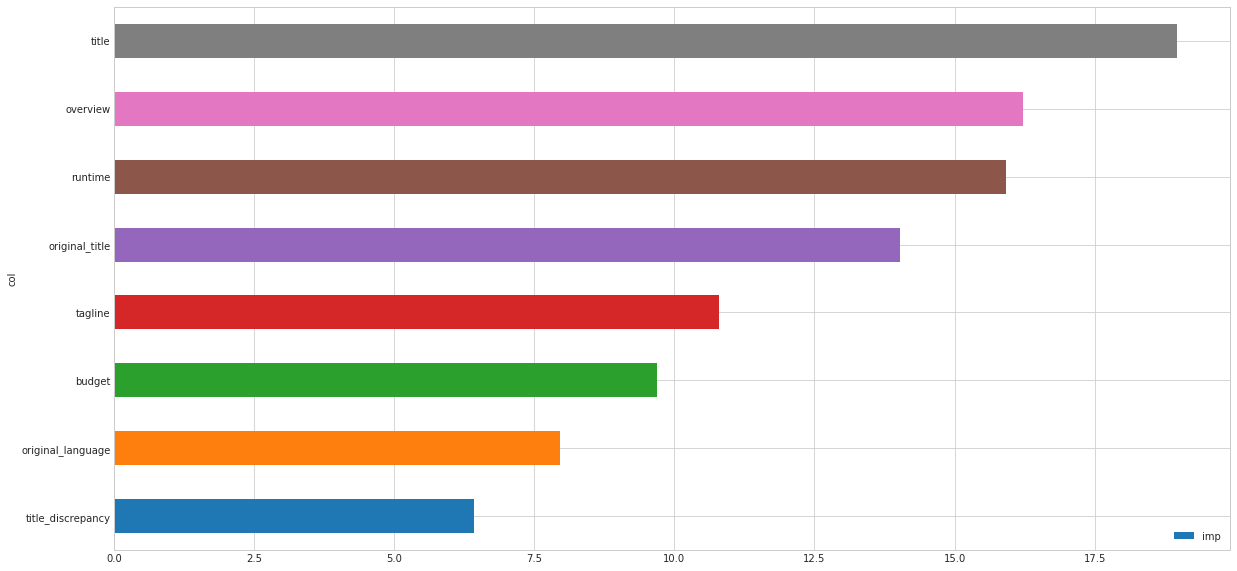

In [158]:
feature_importance(catboost_model, X_train)

In [159]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

Precision: 0.9989868287740631
Recall: 1.0
F1: 0.9994931576279776
AUC: 0.9660020847419428


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [160]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['budget', 'original_language', 'original_title', 'overview', 'runtime',
       'tagline', 'title', 'title_discrepancy'],
      dtype='object')

In [163]:
test_df = test[wanted_test_columns[:-1]]
test_df.head()

,budget,original_language,original_title,overview,runtime,tagline,title
0,0,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,90.0,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai
1,88000,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,65.0,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman
2,0,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,100.0,A Comedy About Lost Loves And Last Laughs,Addicted to Love
3,6800000,fr,Incendies,A mother's last wishes send twins Jeanne and S...,130.0,The search began at the opening of their mothe...,Incendies
4,2000000,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",92.0,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat


In [164]:
test_df["original_title"] = test_df["original_title"].str.len()
test_df["overview"] = test_df["overview"].str.len()
test_df["tagline"] = test_df["tagline"].str.len()
test_df["title"] = test_df["title"].str.len()
test_df["title_discrepancy"] = test_df["original_title"] - test_df["title"]
test_df.head()

,budget,original_language,original_title,overview,runtime,tagline,title,title_discrepancy
0,0,ja,18,335.0,90.0,51.0,28.0,-10.0
1,88000,en,27,162.0,65.0,96.0,27.0,0.0
2,0,en,16,362.0,100.0,41.0,16.0,0.0
3,6800000,fr,9,302.0,130.0,55.0,9.0,0.0
4,2000000,en,18,894.0,92.0,221.0,18.0,0.0


In [165]:
predictions = catboost_model.predict(test_df.apply(LabelEncoder().fit_transform))

In [166]:
predictions[:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [167]:
sample_submission.head()

,id,revenue
0,3001,1000000
1,3002,1000000
2,3003,1000000
3,3004,1000000
4,3005,1000000


In [168]:
submission = pd.DataFrame()
submission['id'] = test["id"]
submission['revenue'] = predictions.astype(int)
submission.head()

,id,revenue
0,3001,1
1,3002,1
2,3003,1
3,3004,1
4,3005,1


In [169]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (4398 rows).


In [170]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('./data/submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [171]:
submissions_check = pd.read_csv("./data/submission.csv")
submissions_check.head()

,id,revenue
0,3001,1
1,3002,1
2,3003,1
3,3004,1
4,3005,1
